## Burgers (Liquid)

In [1]:
using RHEOS
include("plotmodel.jl");

In [2]:
BurgersLiquid


Model name: burgerliquid

Free parameters: η₁, k₁, η₂ and k₂


                                                         ___
                                                 _________| |________
                 ___                            |        _|_| η₂     |
             _____| |________╱╲  ╱╲  ╱╲  _______|                    |____
                 _|_|          ╲╱  ╲╱  ╲╱       |                    |
                    η₁                  k₁      |____╱╲  ╱╲  ╱╲  ____|
                                                       ╲╱  ╲╱  ╲╱
                                                                 k₂

                

### Constitutive equation
$\sigma(t) + p_1 \frac{d \sigma(t)}{dt} + p_2  \frac{d^2 \sigma(t)}{dt^2} = q_1  \frac{d \epsilon(t)}{dt} + q_2  \frac{d^2 \epsilon(t)}{dt^2}$

where $p_1 = \frac{\eta_1}{k_1}+\frac{\eta_1}{k_2}+\frac{\eta_1}{k_2}$, $p_2 = \frac{\eta_1 \eta_2}{k_1 k_2}$, $q_1 =  \eta_1$ and $q_2 = \frac{\eta_1 \eta_2}{k_2}$.

### Relaxation modulus
$G(t) = \left[ \left(q_1 - q_2 r_1\right) e^{-r_1 t}  - \left(q_1 - q_2 r_2\right) e^{-r_2 t} \right]/A$

where $r_1 = (p_1-A)/2p_2$, $r_2 = (p_1 +A) /2p_2$, and $A = \sqrt{p_1^2 - 4p_2}$

### Creep modulus
$J(t) = \frac{1}{k_1} + \frac{t}{\eta_1} + \frac{1}{k_2} \left(1-e^{-k_2 t/\eta_2}\right)$

### Storage modulus
$G^{\prime}(\omega) = \frac{p_1 q_1 \omega^2 - q_2 \omega^2 (1-p_2 \omega^2)}{p_1^2 \omega^2 + (1-p_2 \omega^2)^2}$

### Loss modulus
$G^{\prime \prime}(\omega) = \frac{p_1 q_2 \omega^3 + q_1 \omega (1-p_2 \omega^2)}{p_1^2 \omega^2 + (1-p_2 \omega^2)^2}$

### Qualitative behaviours of the moduli

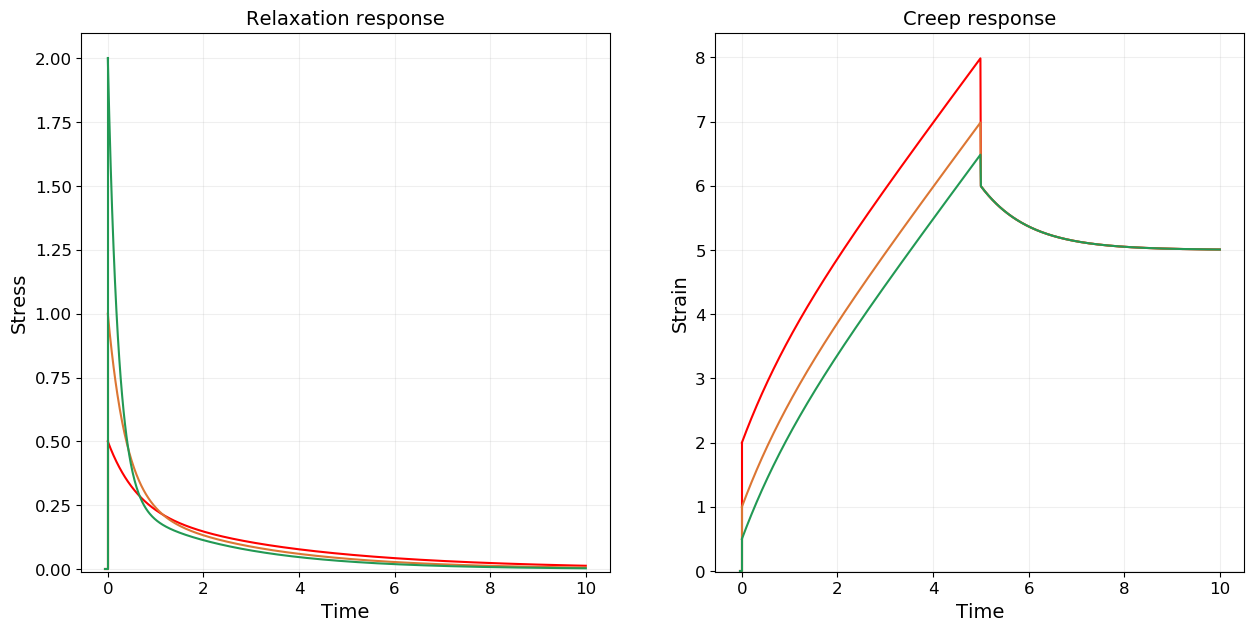

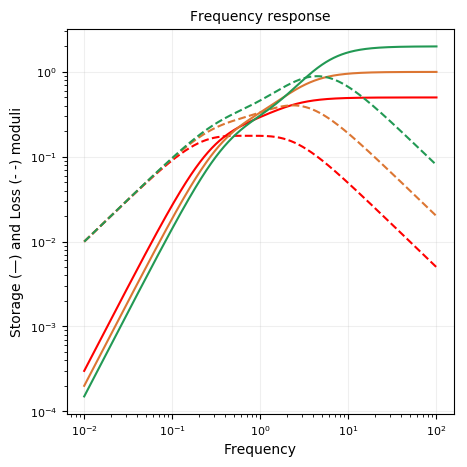

In [3]:
models = Vector{RheoModel}()

# plot moduli for varying k₁
for k in [0.5, 1.0, 2.0]
    
    push!(models,RheoModel(BurgersLiquid,(η₁ = 1, k₁ = k, η₂ = 1, k₂ = 1)))
 
end

plotmodel(models);

**Reference** 

Findley, William N., and Francis A. Davis. Creep and relaxation of nonlinear viscoelastic materials. Courier Corporation, 2013.